In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
train_data = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', nrows=5000)
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv', nrows = 5000)

In [8]:
train_data.shape

(5000, 190)

In [9]:
train_labels.shape

(5000, 2)

In [10]:
train_labels.head

<bound method NDFrame.head of                                             customer_ID  target
0     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1     00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2     00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3     000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4     00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                 ...     ...
4995  02cd785e3f7a04360ffa501c4ed676ceca8fc29538a1c0...       0
4996  02cdd7500c03bd2fb73eb0fc44bd0126ef58316f2c7021...       0
4997  02cde14927e62232e0fa6388b31796fa17fd057da8a0b6...       0
4998  02ce0eb533f00c061e1fda9f5720e3ea97681c7fde716e...       0
4999  02ce1f612c586a0d8ace48582bdd6e20120ab530566fe8...       0

[5000 rows x 2 columns]>

In [11]:
train_labels.tail

<bound method NDFrame.tail of                                             customer_ID  target
0     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1     00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2     00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3     000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4     00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                 ...     ...
4995  02cd785e3f7a04360ffa501c4ed676ceca8fc29538a1c0...       0
4996  02cdd7500c03bd2fb73eb0fc44bd0126ef58316f2c7021...       0
4997  02cde14927e62232e0fa6388b31796fa17fd057da8a0b6...       0
4998  02ce0eb533f00c061e1fda9f5720e3ea97681c7fde716e...       0
4999  02ce1f612c586a0d8ace48582bdd6e20120ab530566fe8...       0

[5000 rows x 2 columns]>

In [14]:
count = (train_labels['target'] == 0).sum()
count

3672

In [15]:
train = pd.merge(train_data, train_labels)
train.head

<bound method NDFrame.head of                                             customer_ID         S_2       P_2  \
0     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   
...                                                 ...         ...       ...   
4995  003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...  2017-07-04  0.657808   
4996  003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...  2017-08-22  0.648326   
4997  003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...  2017-09-22  0.649564   
4998  003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...  2017-10-29  0.639805   
4999  003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...  2017-11-07  0.642809  

In [16]:
train.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [18]:
train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,4974.000000,5000.000000,5000.000000,5000.000000,5000.000000,4155.000000,5.000000e+03,5000.000000,662.000000,3473.000000,...,158.000000,158.000000,4933.000000,4971.000000,4933.000000,769.000000,4933.000000,4.971000e+03,4933.000000,5000.000000
mean,0.653350,0.166811,0.127618,0.627920,0.073639,0.236156,6.498420e-02,0.131585,0.163255,0.148360,...,0.011133,0.286857,0.160930,0.024189,0.147143,0.366827,0.157450,4.531392e-02,0.054712,0.253000
std,0.250074,0.296291,0.214604,0.400497,0.223948,0.216964,2.127772e-01,0.239756,0.186754,0.190282,...,0.079966,0.345289,0.362744,0.136954,0.331390,0.218737,0.359564,1.743994e-01,0.180002,0.434774
min,-0.256921,0.000007,-0.035262,0.000038,0.000003,-0.081511,6.841272e-07,0.000013,0.000859,0.000067,...,0.000011,0.000076,0.000003,0.000008,0.000008,-0.007573,0.000002,9.481396e-07,0.000004,0.000000
25%,0.471157,0.004530,0.009138,0.104118,0.002887,0.126845,2.991878e-03,0.005183,0.050651,0.039945,...,0.002070,0.005395,0.003001,0.002658,0.003007,0.174226,0.002847,2.713350e-03,0.002882,0.000000
50%,0.694830,0.009292,0.032905,0.814443,0.005689,0.162173,5.853673e-03,0.009767,0.139848,0.082434,...,0.004809,0.009688,0.006045,0.005232,0.005967,0.350277,0.005880,5.340889e-03,0.005860,0.000000
75%,0.866318,0.244440,0.120810,1.002354,0.008447,0.264222,8.720267e-03,0.152242,0.214909,0.177145,...,0.007397,0.505759,0.008949,0.007710,0.008712,0.560906,0.008869,8.077414e-03,0.008856,1.000000
max,1.009926,4.268383,1.322087,1.009999,2.259283,1.621447,2.592768e+00,1.258546,2.556439,2.043855,...,1.009248,1.507652,1.009989,1.009452,1.047103,0.877675,1.010000,1.341404e+00,1.639733,1.000000


In [19]:
train.isnull().sum()

customer_ID       0
S_2               0
P_2              26
D_39              0
B_1               0
               ... 
D_142          4231
D_143            67
D_144            29
D_145            67
target            0
Length: 191, dtype: int64

In [22]:
bad_features = train.isnull().mean() > 0.6
train.drop(train.columns[bad_features], axis = 1, inplace = True)

In [23]:
train.isnull().sum()

customer_ID     0
S_2             0
P_2            26
D_39            0
B_1             0
               ..
D_141          67
D_143          67
D_144          29
D_145          67
target          0
Length: 166, dtype: int64

In [25]:
df = train

In [26]:
mask_int = df.dtypes == int
df_int = df.columns[mask_int]
print(df_int)

Index(['B_31', 'target'], dtype='object')


In [27]:
mask_float = df.dtypes == float
df_cols = df.columns[mask_float]
print(df_cols)

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_130', 'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=160)


In [28]:
corr = df[df_cols].corrwith(df.target)
corr = corr.abs()
corr.sort_values(inplace=True, ascending=False)
corr[:10]


P_2     0.644960
D_48    0.589541
D_61    0.512414
D_55    0.483388
D_44    0.473741
D_75    0.460880
D_58    0.450404
B_18    0.438322
B_9     0.434304
D_74    0.430610
dtype: float64

In [29]:
high_corr = corr[:10].index
high_corr  = list(high_corr)
high_corr.append('target')


In [30]:
import seaborn as sns

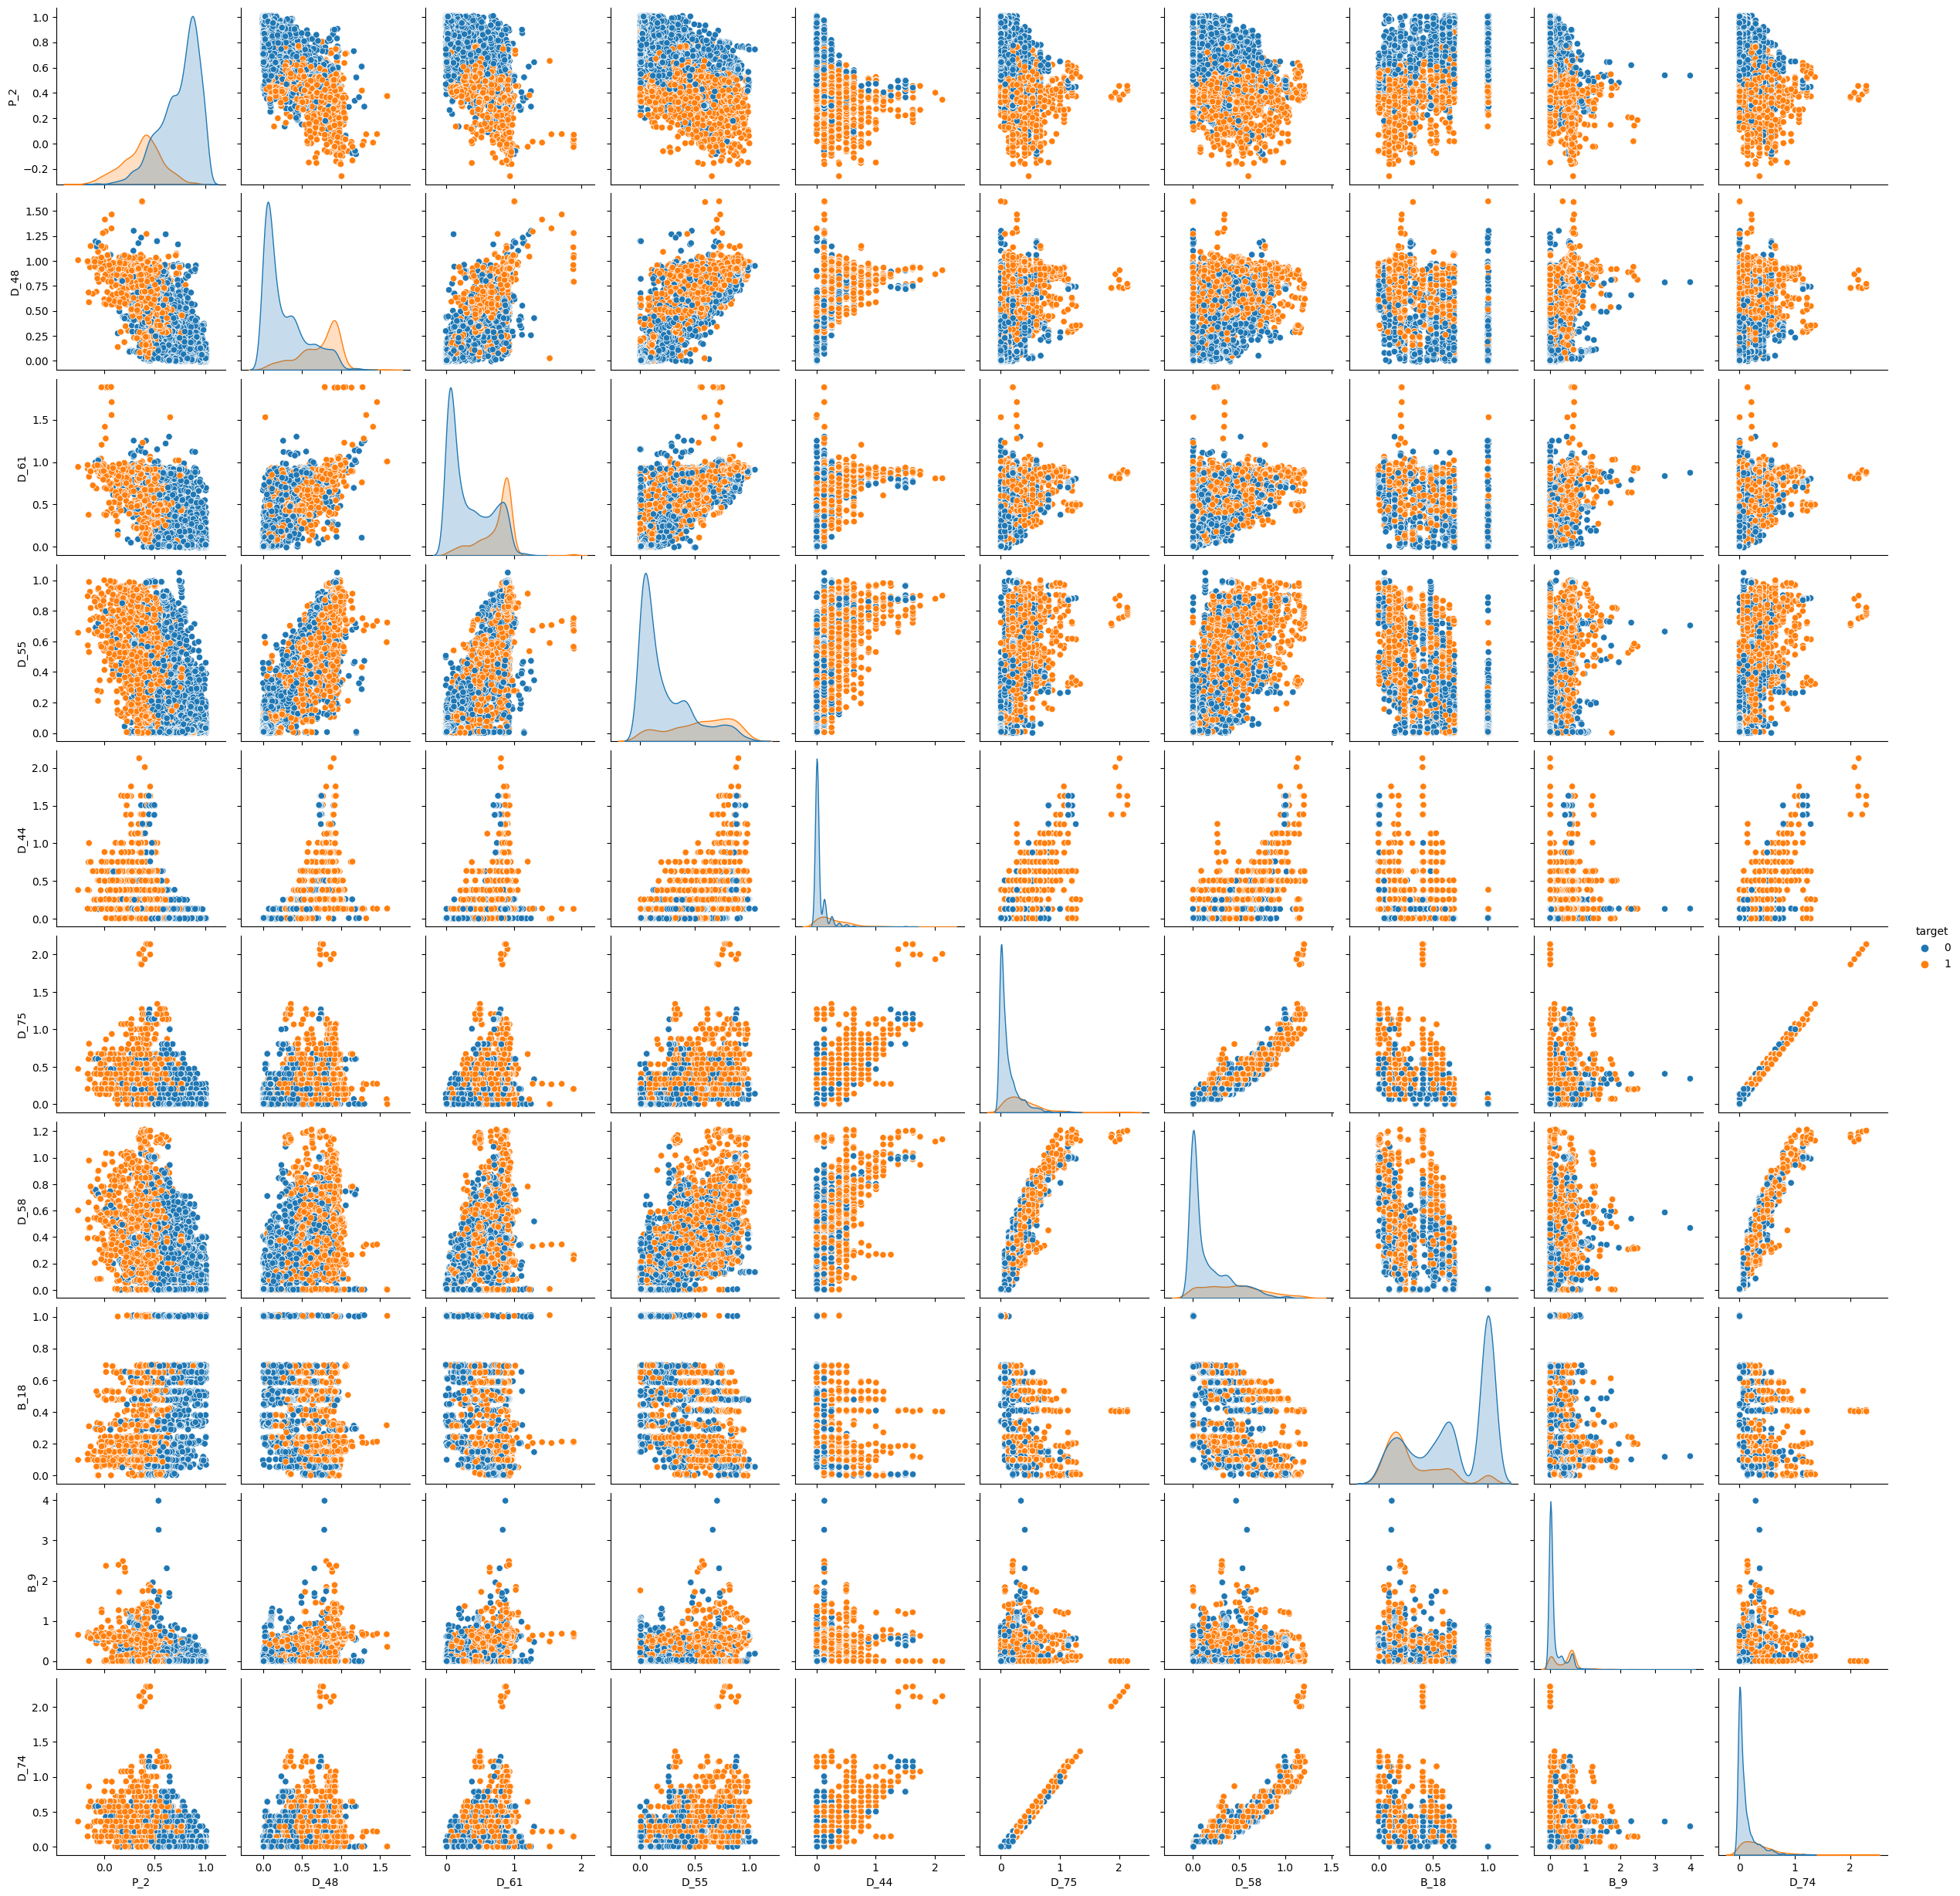

In [31]:
sns.pairplot(df[high_corr], hue='target')

In [32]:
mask = df.dtypes == object
mask['customer_ID'] = False
df_cat = df.columns[mask]
print(df_cat)


Index(['S_2', 'D_63', 'D_64'], dtype='object')


In [34]:
#Determine how many extra columns would be created
num_ohc_cols = (df[df_cat].apply(lambda x: x.nunique()).sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()


403

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [36]:
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(df[col]).astype(int)
    
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_cat_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=df.index, 
                          columns=col_names)
    
    # Append the new data to the dataframe
    df = pd.concat([df, new_df], axis=1)
    
    # Remove the original column from the dataframe
    df = df.drop(col, axis=1)


In [37]:
df.head().T

,0,1,2,3,4
customer_ID,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
P_2,0.938469,0.936665,0.95418,0.960384,0.947248
D_39,0.001733,0.005775,0.091505,0.002455,0.002483
B_1,0.008724,0.004923,0.021655,0.013683,0.015193
B_2,1.006838,1.000653,1.009672,1.0027,1.000727
...,...,...,...,...,...
D_64_cat_0,0.0,0.0,0.0,0.0,0.0
D_64_cat_1,1.0,1.0,1.0,1.0,1.0
D_64_cat_2,0.0,0.0,0.0,0.0,0.0
D_64_cat_3,0.0,0.0,0.0,0.0,0.0


In [38]:
for col in df.columns:
    if col in df_int or col in df_cols:
        mean_value = df[col].mean()
        print('Filling NAN of {} with mean value of {}'.format(col, mean_value))
        df[col].fillna(value=mean_value, inplace=True)


Filling NAN of P_2 with mean value of 0.6533499374421906
Filling NAN of D_39 with mean value of 0.16681060831800285
Filling NAN of B_1 with mean value of 0.12761789475481036
Filling NAN of B_2 with mean value of 0.6279203339112048
Filling NAN of R_1 with mean value of 0.07363944556171226
Filling NAN of S_3 with mean value of 0.2361562411193938
Filling NAN of D_41 with mean value of 0.06498419867992791
Filling NAN of B_3 with mean value of 0.131584951801927
Filling NAN of D_43 with mean value of 0.1483602387131849
Filling NAN of D_44 with mean value of 0.12489699242426343
Filling NAN of B_4 with mean value of 0.18145351345129979
Filling NAN of D_45 with mean value of 0.25496719087225217
Filling NAN of B_5 with mean value of 0.08292223548011642
Filling NAN of R_2 with mean value of 0.048596452961753286
Filling NAN of D_46 with mean value of 0.4803755807267007
Filling NAN of D_47 with mean value of 0.43409594641588917
Filling NAN of D_48 with mean value of 0.3925183366629933
Filling NAN o

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = df.drop(['customer_ID','target'], axis=1)
y=df['target']

In [41]:
mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<Axes: xlabel='target'>

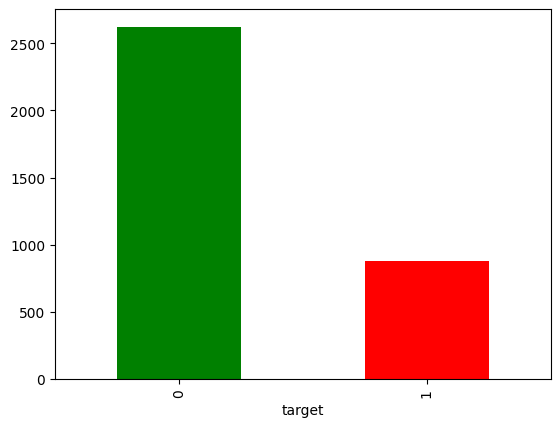

In [44]:
y_train.value_counts().plot.bar(color=['green', 'red'])

In [45]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1, max_features = "auto", class_weight="balanced", max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='auto',
                       max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [49]:
predict_rf = model_rf.predict(X_test)

In [52]:
cm_rf=confusion_matrix(y_test,predict_rf)
print("Confusion Matrix   :", cm_rf)
r2_rf=r2_score(y_test,predict_rf)
print("R Squared   :", r2_rf)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, predict_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, predict_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, predict_rf)
print("F1-score  :", F1_score_rf)

Confusion Matrix   : [[981 131]
 [ 23 365]]
R Squared   : 0.4646035748720614
Accuracy   : 0.8973333333333333
Precision : 0.7358870967741935
Recall    : 0.9407216494845361
F1-score  : 0.8257918552036199


<Axes: >

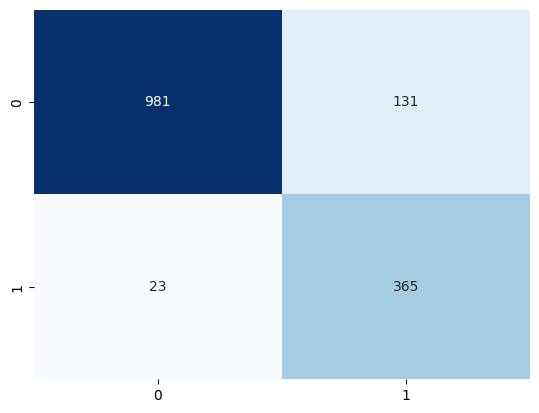

In [53]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

In [54]:
from xgboost import XGBClassifier

In [55]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
pred_xg = model_xg.predict(X_test)

In [57]:
cm_xg=confusion_matrix(y_test,pred_xg)
print("Confusion Matrix   :", cm_xg)
r2_xg=r2_score(y_test,pred_xg)
print("R Squared   :", r2_xg)
accuracy_xg = accuracy_score(y_test, pred_xg)
print("Accuracy   :", accuracy_xg)
precision_xg = precision_score(y_test, pred_xg)
print("Precision :", precision_xg)
recall_xg = recall_score(y_test, pred_xg)
print("Recall    :", recall_xg)
F1_score_xg = f1_score(y_test, pred_xg)
print("F1-score  :", F1_score_xg)

Confusion Matrix   : [[1100   12]
 [  16  372]]
R Squared   : 0.9026551954312839
Accuracy   : 0.9813333333333333
Precision : 0.96875
Recall    : 0.9587628865979382
F1-score  : 0.9637305699481865


<Axes: >

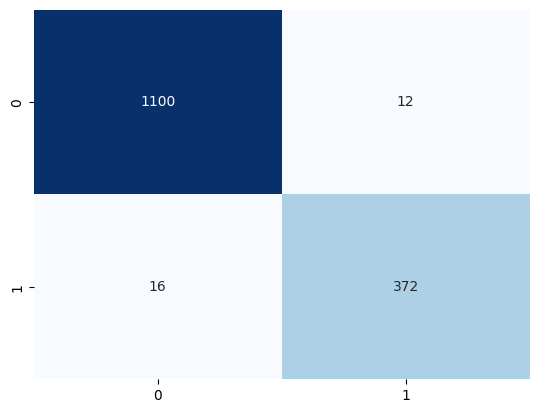

In [58]:
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues', cbar=False)